<a href="https://colab.research.google.com/github/Lalitha1704/Stock_Price_Prediction/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
from statsmodels.tsa.arima.model import ARIMA
# Set the figure size
rcParams['figure.figsize'] = 15, 6
# Ensure inline plotting for Jupyter Notebook
%matplotlib inline

In [35]:
# Load the CSV file
data = pd.read_csv('/content/zomato.csv')
# Display the first 5 rows of the dataset
print(data.head())
# Print data types of each column
print('\nData Types:')
print(data.dtypes)

         Date        Open        High         Low       Close   Adj Close  \
0  2021-07-23  116.000000  138.899994  115.000000  126.000000  126.000000   
1  2021-07-26  126.349998  143.750000  125.300003  140.649994  140.649994   
2  2021-07-27  141.699997  147.800003  127.750000  132.899994  132.899994   
3  2021-07-28  131.000000  135.000000  123.550003  131.199997  131.199997   
4  2021-07-29  134.949997  144.000000  132.199997  141.550003  141.550003   

      Volume  
0  694895290  
1  249723854  
2  240341900  
3  159793731  
4  117973089  

Data Types:
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


In [5]:
num_rows = data.shape[0]
print(f"Number of rows in the dataset: {num_rows}")

Number of rows in the dataset: 631


In [6]:
print(data.isnull().sum())  # Checks if there are any missing values in each column

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [7]:
print("Total duplicate rows:", data.duplicated().sum())

# # Remove duplicates
# data = data.drop_duplicates()

Total duplicate rows: 0


In [8]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,631.000000,631.000000,631.000000,631.000000,631.000000,6.310000e+02
mean,90.011252,91.835737,87.868304,89.707686,89.707686,6.731737e+07
std,32.757639,33.319545,31.900849,32.621900,32.621900,7.461030e+07
min,40.849998,44.400002,40.599998,41.650002,41.650002,0.000000e+00
25%,62.549999,63.450001,61.125000,62.074998,62.074998,2.800788e+07
50%,80.000000,81.000000,78.099998,79.699997,79.699997,4.759710e+07
75%,124.474998,126.750000,121.525002,124.599998,124.599998,7.525439e+07
max,161.149994,169.000000,154.250000,160.300003,160.300003,6.948953e+08


In [9]:
num_rows = data.shape[0]
print(f"Number of rows in the dataset: {num_rows}")

Number of rows in the dataset: 631


In [36]:
# import pandas as pd
from datetime import datetime
# Date parsing function
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m-%d')
# Load the CSV file with date parsing
data = pd.read_csv('/content/zomato.csv', parse_dates=['Date'], index_col='Date')
# Display the first 5 rows of the dataset
print(data.head())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-07-23  116.000000  138.899994  115.000000  126.000000  126.000000   
2021-07-26  126.349998  143.750000  125.300003  140.649994  140.649994   
2021-07-27  141.699997  147.800003  127.750000  132.899994  132.899994   
2021-07-28  131.000000  135.000000  123.550003  131.199997  131.199997   
2021-07-29  134.949997  144.000000  132.199997  141.550003  141.550003   

               Volume  
Date                   
2021-07-23  694895290  
2021-07-26  249723854  
2021-07-27  240341900  
2021-07-28  159793731  
2021-07-29  117973089  


In [11]:
#check datatype of index
data.index

DatetimeIndex(['2021-07-23', '2021-07-26', '2021-07-27', '2021-07-28',
               '2021-07-29', '2021-07-30', '2021-08-02', '2021-08-03',
               '2021-08-04', '2021-08-05',
               ...
               '2024-01-24', '2024-01-25', '2024-01-29', '2024-01-30',
               '2024-01-31', '2024-02-01', '2024-02-02', '2024-02-05',
               '2024-02-06', '2024-02-07'],
              dtype='datetime64[ns]', name='Date', length=631, freq=None)

In [12]:
#convert to time series:
ts = data['Adj Close']
ts.head(10)

,Adj Close
Date,
2021-07-23,126.000000
2021-07-26,140.649994
2021-07-27,132.899994
2021-07-28,131.199997
2021-07-29,141.550003
2021-07-30,133.500000
2021-08-02,139.699997
2021-08-03,139.399994
2021-08-04,138.399994


In [13]:
ts['2021-07-29']


141.550003

In [14]:
#2. Import the datetime library and use 'datetime' function:
from datetime import datetime
ts[datetime(2024, 1, 23)]

130.100006

In [15]:
#1. Specify the entire range:
ts['2021-07-23':'2024-1-23']

,Adj Close
Date,
2021-07-23,126.000000
2021-07-26,140.649994
2021-07-27,132.899994
2021-07-28,131.199997
2021-07-29,141.550003
...,...
2024-01-17,127.400002
2024-01-18,129.449997
2024-01-19,135.050003


In [16]:
#2. Use ':' if one of the indices is at ends:
ts[:'2023-07-28']

,Adj Close
Date,
2021-07-23,126.000000
2021-07-26,140.649994
2021-07-27,132.899994
2021-07-28,131.199997
2021-07-29,141.550003
...,...
2023-07-24,81.300003
2023-07-25,82.650002
2023-07-26,83.349998


In [17]:
ts['2021']

,Adj Close
Date,
2021-07-23,126.000000
2021-07-26,140.649994
2021-07-27,132.899994
2021-07-28,131.199997
2021-07-29,141.550003
...,...
2021-12-27,132.750000
2021-12-28,132.850006
2021-12-29,137.100006


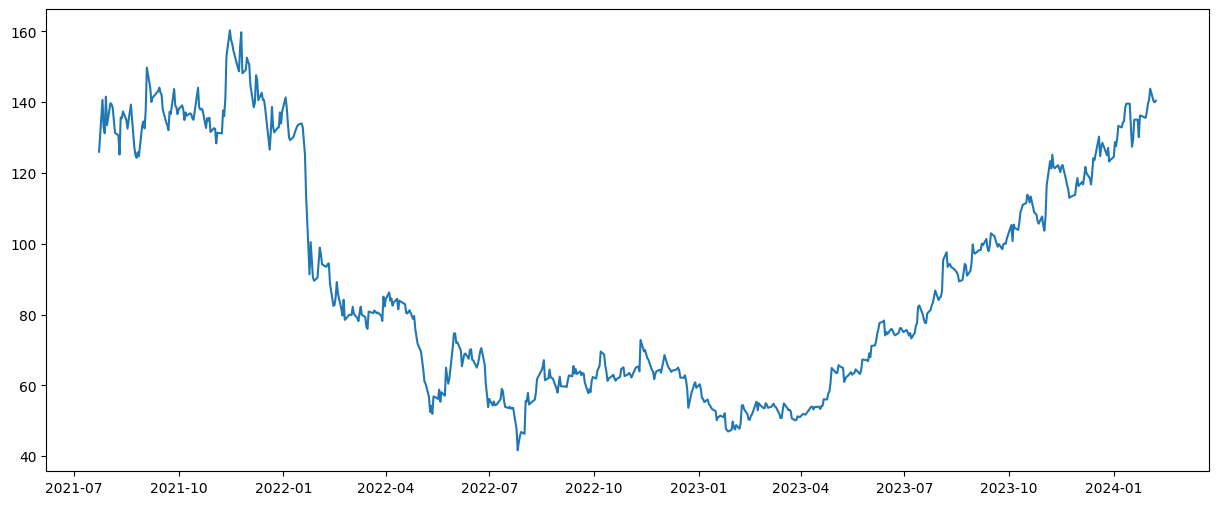

In [18]:
plt.plot(ts)

In [37]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    # Determine rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    # Plot rolling statistics
    plt.figure(figsize=(12, 6))
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    # Perform Dickey-Fuller test
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])

    for key, value in dftest[4].items():
        dfoutput[f'Critical Value ({key})'] = value

    print(dfoutput)


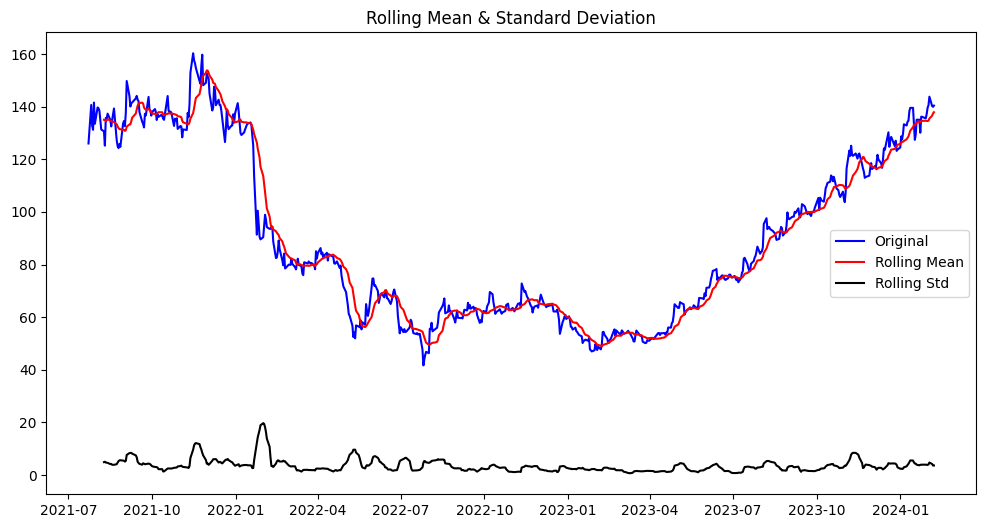

Results of Dickey-Fuller Test:
Test Statistic                  -0.956977
p-value                          0.768631
#Lags Used                       0.000000
Number of Observations Used    630.000000
Critical Value (1%)             -3.440772
Critical Value (5%)             -2.866139
Critical Value (10%)            -2.569219
dtype: float64


In [20]:
test_stationarity(ts)

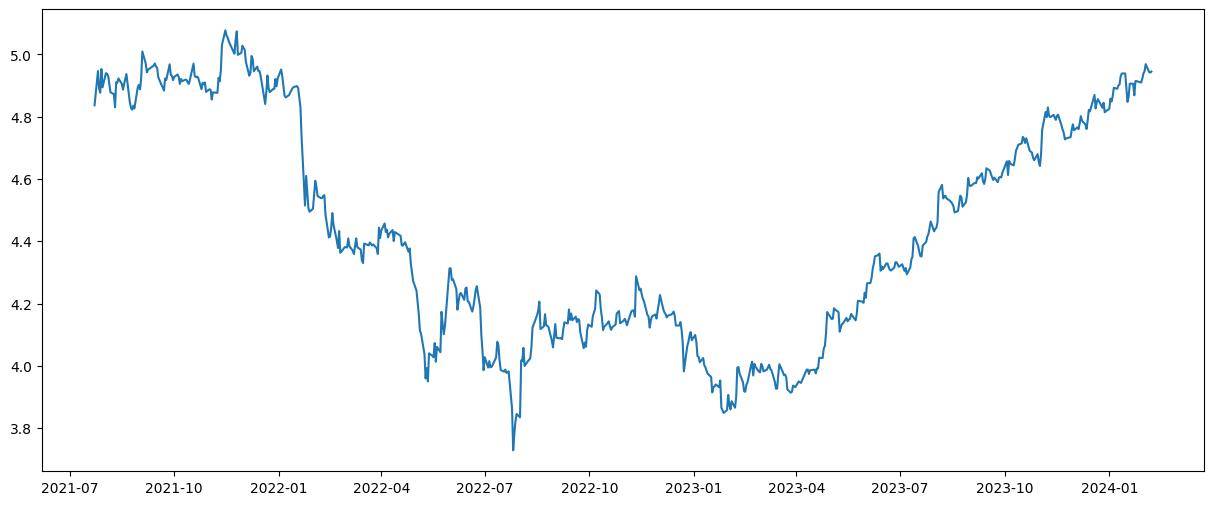

In [21]:
ts_log = np.log(ts)
plt.plot(ts_log)

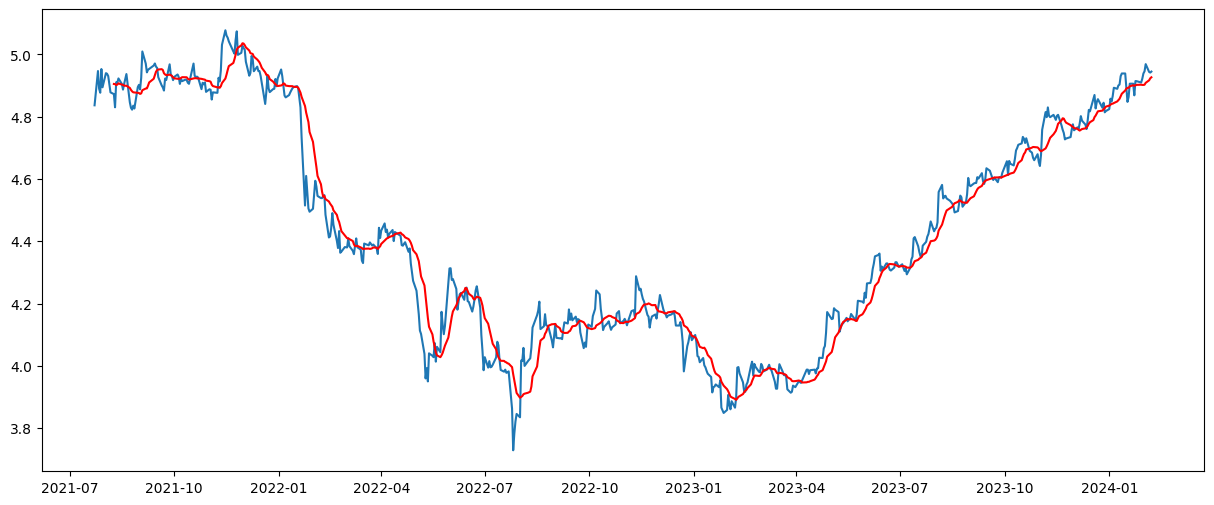

In [22]:
moving_avg = ts_log.rolling(window=12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [23]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

,Adj Close
Date,
2021-07-23,NaN
2021-07-26,NaN
2021-07-27,NaN
2021-07-28,NaN
2021-07-29,NaN
2021-07-30,NaN
2021-08-02,NaN
2021-08-03,NaN
2021-08-04,NaN


In [24]:
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head()

,Adj Close
Date,
2021-08-09,-0.032655
2021-08-10,-0.074351
2021-08-11,0.008831
2021-08-12,0.005772
2021-08-13,0.015884


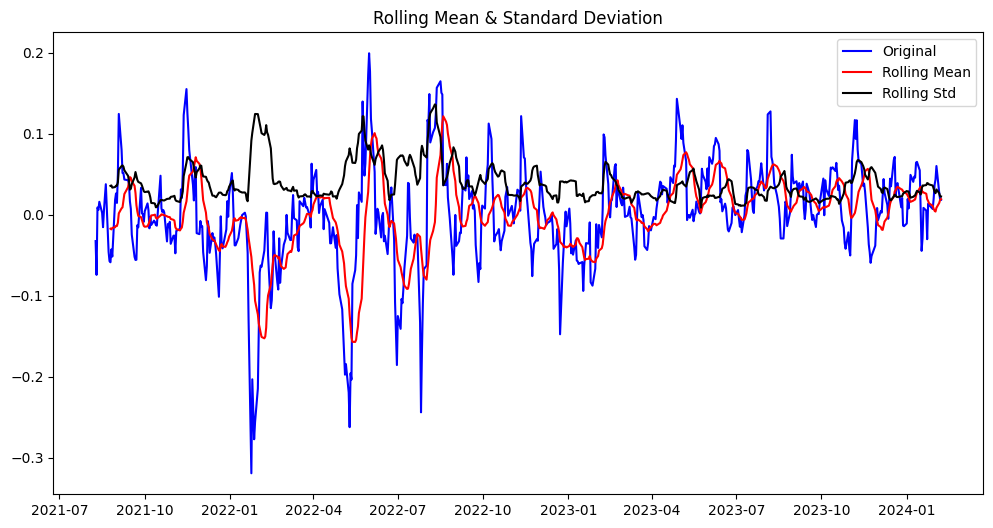

Results of Dickey-Fuller Test:
Test Statistic                -7.290871e+00
p-value                        1.418391e-10
#Lags Used                     2.000000e+00
Number of Observations Used    6.170000e+02
Critical Value (1%)           -3.440993e+00
Critical Value (5%)           -2.866236e+00
Critical Value (10%)          -2.569271e+00
dtype: float64


In [25]:
test_stationarity(ts_log_moving_avg_diff)

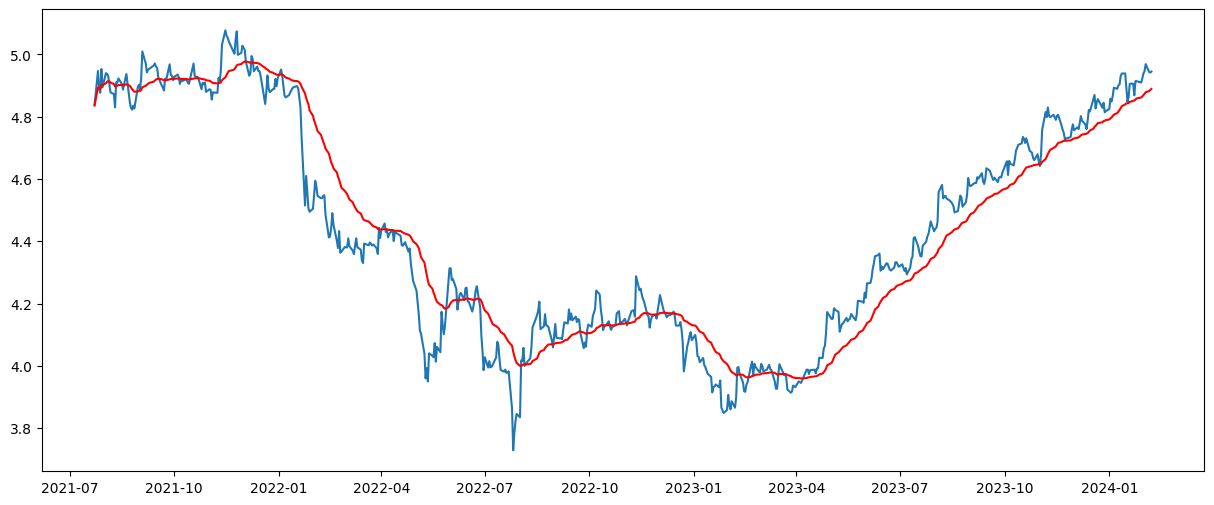

In [26]:
expwighted_avg = ts_log.ewm(halflife=12).mean()
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')
# expwighted_avg.plot(style='k--')

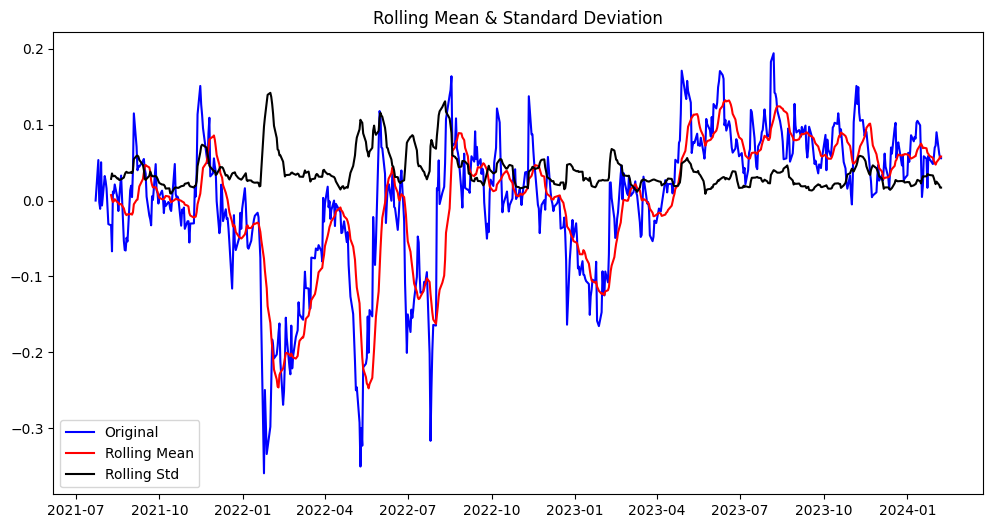

Results of Dickey-Fuller Test:
Test Statistic                  -4.390189
p-value                          0.000309
#Lags Used                       0.000000
Number of Observations Used    630.000000
Critical Value (1%)             -3.440772
Critical Value (5%)             -2.866139
Critical Value (10%)            -2.569219
dtype: float64


In [27]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

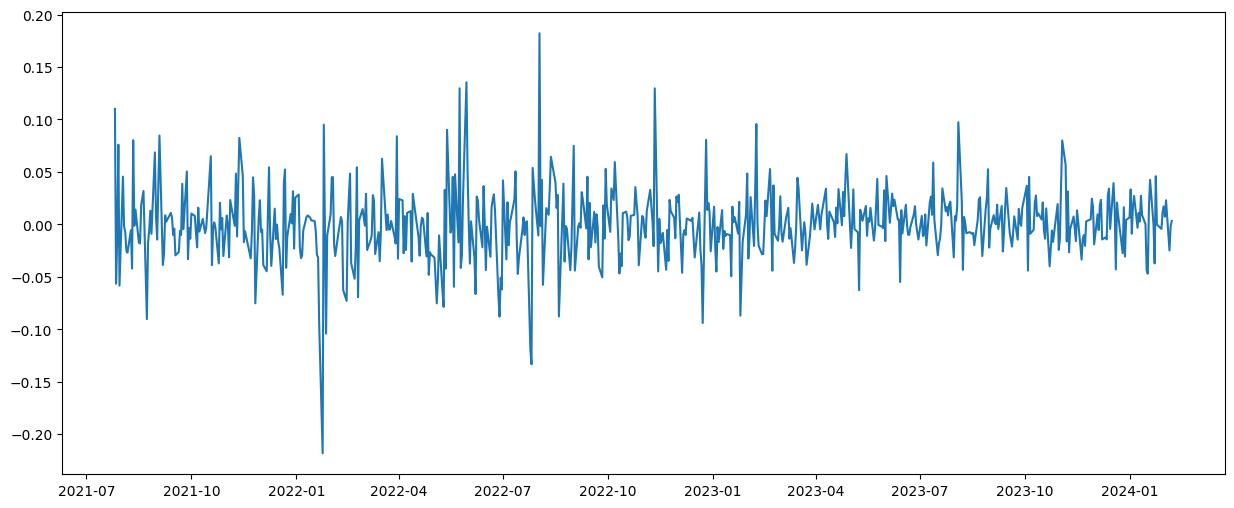

In [28]:
#Take first difference:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

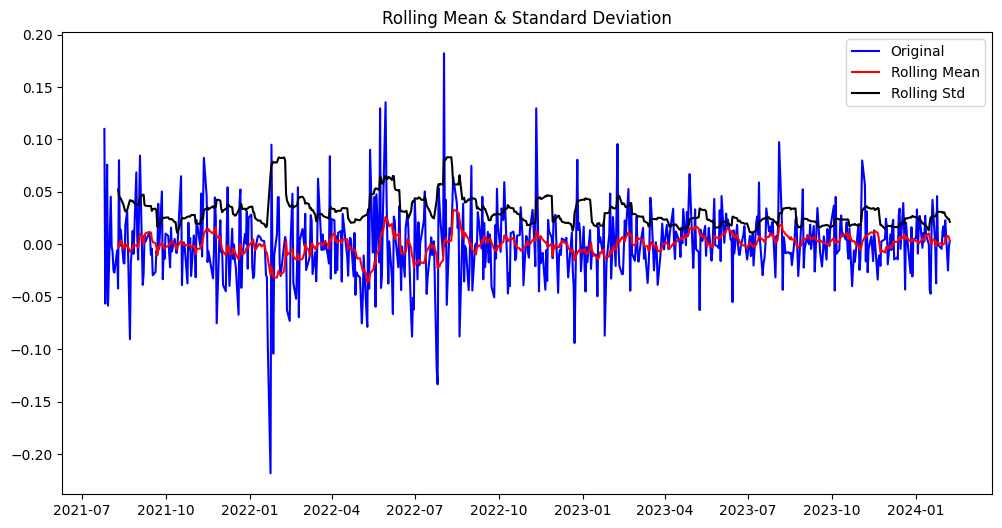

Results of Dickey-Fuller Test:
Test Statistic                 -25.399204
p-value                          0.000000
#Lags Used                       0.000000
Number of Observations Used    629.000000
Critical Value (1%)             -3.440789
Critical Value (5%)             -2.866146
Critical Value (10%)            -2.569223
dtype: float64


In [29]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

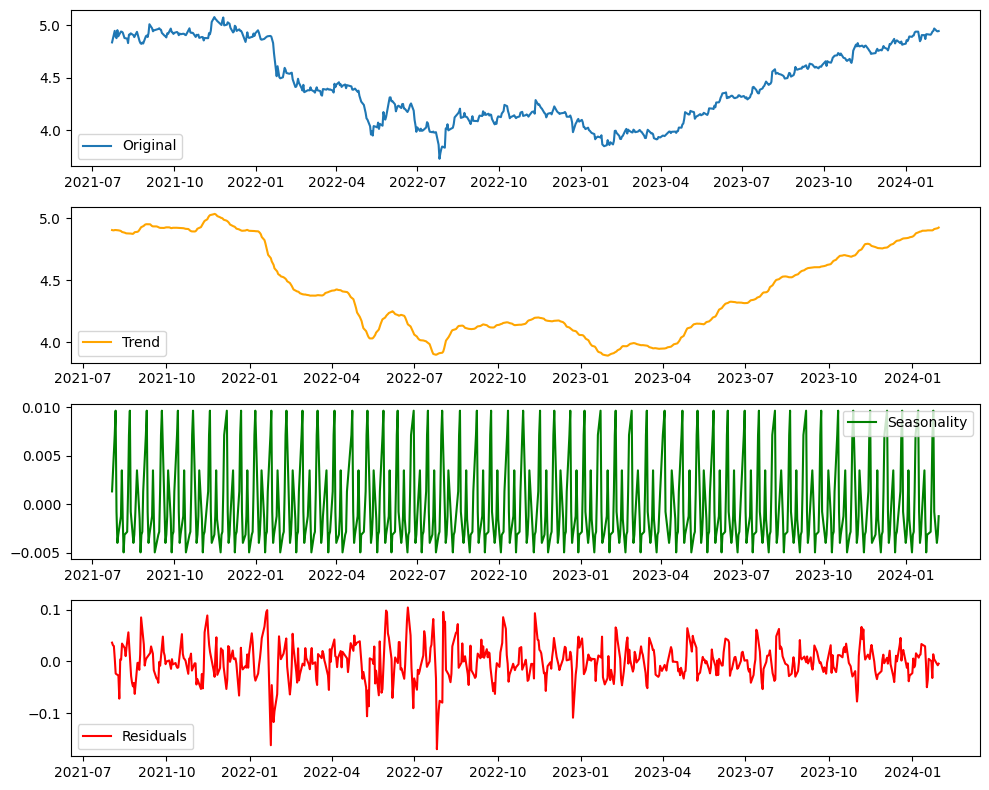

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Perform seasonal decomposition
decomposition = seasonal_decompose(ts_log, model='additive', period=12)
# Extract components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
# Plot the decomposition components
plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='orange')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality', color='green')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='red')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


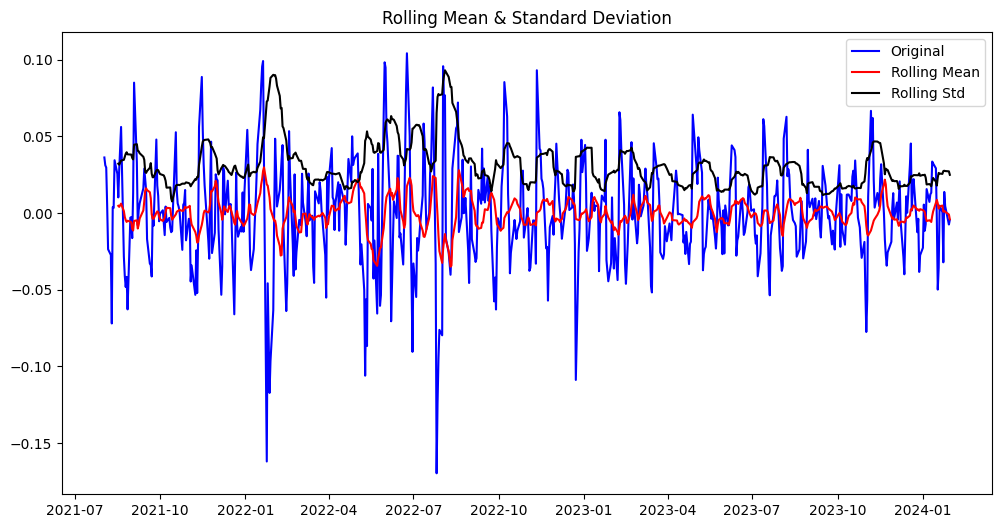

Results of Dickey-Fuller Test:
Test Statistic                -1.036392e+01
p-value                        2.357250e-18
#Lags Used                     1.300000e+01
Number of Observations Used    6.050000e+02
Critical Value (1%)           -3.441205e+00
Critical Value (5%)           -2.866329e+00
Critical Value (10%)          -2.569320e+00
dtype: float64


In [39]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u


Root Mean Square Error (RMSE) on Test Data: 32.7778


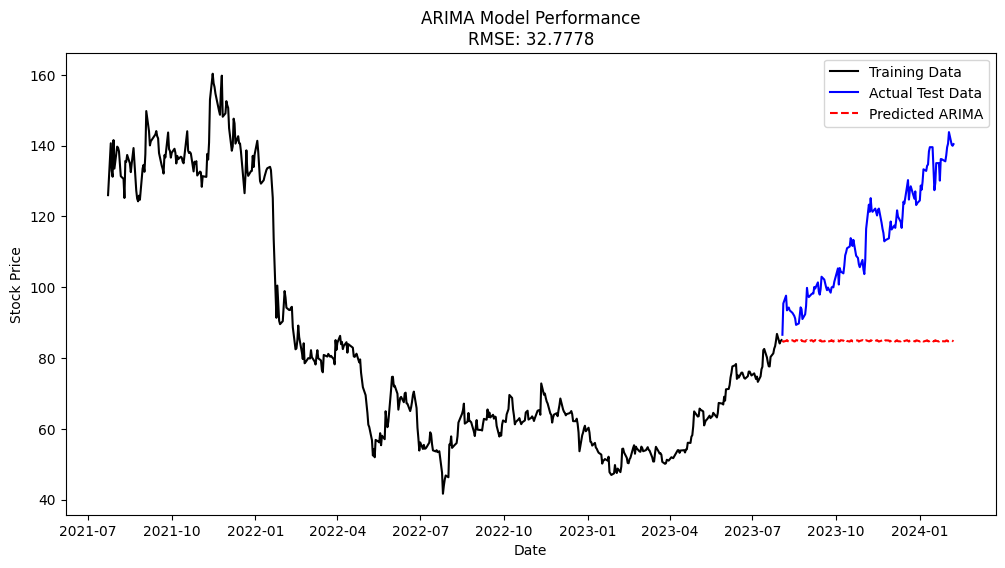

In [42]:
# ✅ Split data into Training and Testing sets (80% Train, 20% Test)
train_size = int(len(ts) * 0.8)
train, test = ts[:train_size], ts[train_size:]

# ✅ Fit ARIMA Model on Training Data
model = ARIMA(train, order=(2,1,2))  # Adjust (p,d,q) values if needed
results_ARIMA = model.fit()

# ✅ Forecast future values for test period
predictions_ARIMA = results_ARIMA.forecast(steps=len(test))

# ✅ Calculate RMSE on Test Data
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test, predictions_ARIMA))
print(f"\nRoot Mean Square Error (RMSE) on Test Data: {rmse:.4f}")

# ✅ Plot Actual vs Predicted Stock Prices
plt.figure(figsize=(12,6))
plt.plot(train, label='Training Data', color='black')
plt.plot(test, label='Actual Test Data', color='blue')
plt.plot(test.index, predictions_ARIMA, label='Predicted ARIMA', linestyle='--', color='red')

plt.title(f'ARIMA Model Performance\nRMSE: {rmse:.4f}')
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()


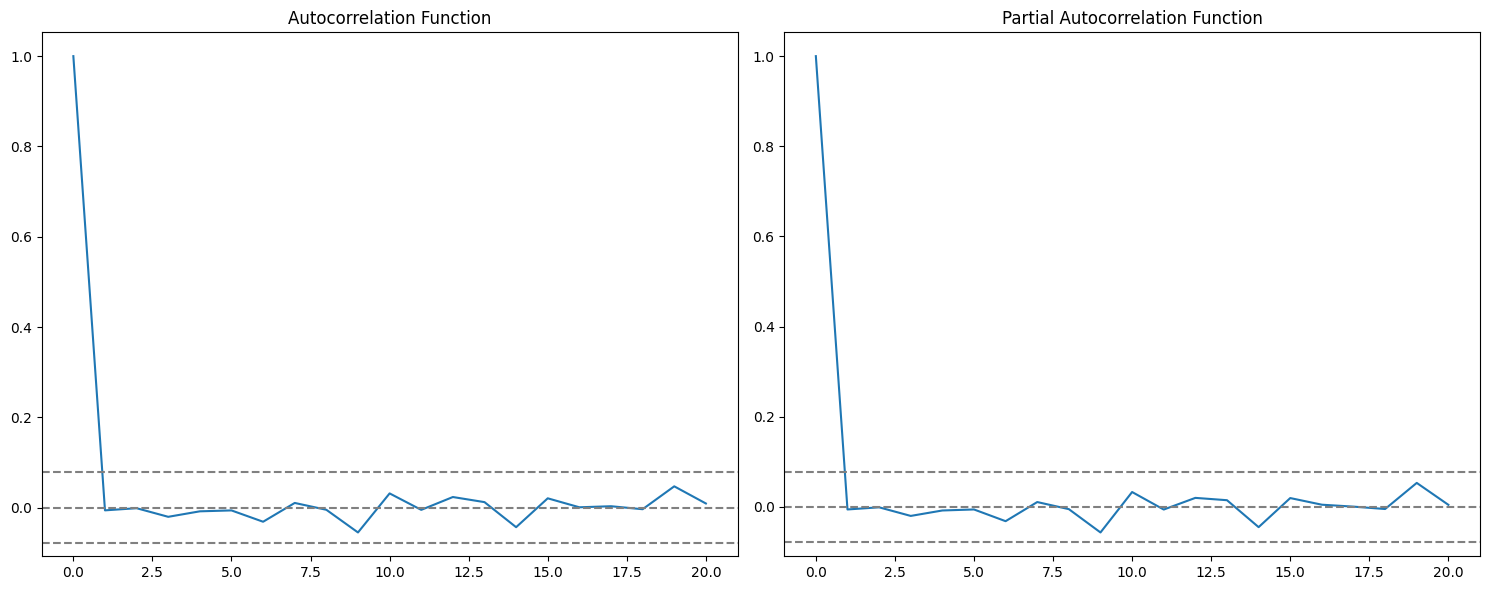

In [43]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')
#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1223 - val_loss: 0.0076
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0077 - val_loss: 0.0089
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0031 - val_loss: 0.0055
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0025 - val_loss: 0.0053
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0023 - val_loss: 0.0108
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0034 - val_loss: 0.0035
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0030 - val_loss: 0.0019
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0032 - val_loss: 0.0025
Epoch 9/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0020 - val_loss: 0.0054
Epoch 10/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0019 - val_loss: 0.0024
Epoch 11/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0026 - val_loss: 0.0046
Epoch 12/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0

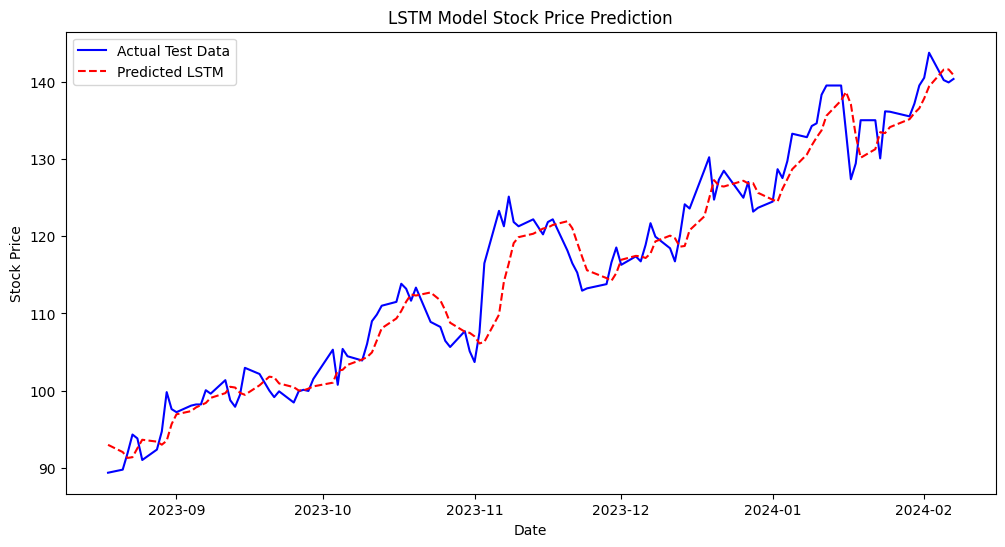

In [52]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# ✅ 1. Normalize the Data
scaler = MinMaxScaler(feature_range=(0,1))
train_scaled = scaler.fit_transform(np.array(train).reshape(-1,1))
test_scaled = scaler.transform(np.array(test).reshape(-1,1))

# ✅ 2. Create Sequences for LSTM
def create_sequences(data, time_steps=10):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])  # Take previous 'time_steps' values
        y.append(data[i+time_steps])    # Predict next value
    return np.array(X), np.array(y)

time_steps = 10  # Number of past days to use for prediction
X_train, y_train = create_sequences(train_scaled, time_steps)
X_test, y_test = create_sequences(test_scaled, time_steps)

# ✅ 3. Reshape Data for LSTM (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# ✅ 4. Build the LSTM Model
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(time_steps, 1)),
    LSTM(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# ✅ 5. Train the LSTM Model
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

# ✅ 6. Predict Stock Prices
predictions_LSTM = model.predict(X_test)

# ✅ 7. Inverse Transform Predictions
predictions_LSTM = scaler.inverse_transform(predictions_LSTM)

# ✅ 8. Plot Results
plt.figure(figsize=(12,6))
plt.plot(test.index[time_steps:], scaler.inverse_transform(y_test.reshape(-1,1)), label='Actual Test Data', color='blue')
plt.plot(test.index[time_steps:], predictions_LSTM, label='Predicted LSTM', linestyle='--', color='red')

plt.title("LSTM Model Stock Price Prediction")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()